# Credit Card Fraud Detection

The credit card fraud detection data comes from [kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud). The data is post principal component analysis in order to protect privacy of the credit card users. There are 28 principal components, a time variable, and amount variable, and a binary class variable where a 1 represents a fradualent case and a 0 represents a non-fradualent case.

In [33]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as Knn
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
import xgboost as xgb

#Visualization and utility
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.colors as cl
%matplotlib inline

#Criterion
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report , confusion_matrix

#Model Selection
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold, StratifiedKFold

#Imbalanced Learn over_sampling and preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler,StandardScaler


In [7]:
data = pd.read_csv('/Users/clayolsen1/ML_folder/anomly_detection_ML/creditcard.csv')
data.head()
data.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.473120e-16  8.042109e-16  5.282512e-16  4.456271e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.426896e-15  1.701640e-15 -3.662252e-16 -1.217809e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

## Exploratory Analysis

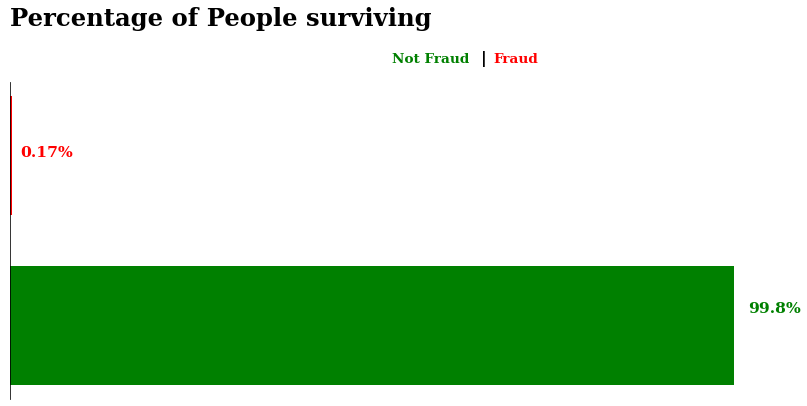

In [9]:
%%capture --no-display

# color palette for visualizations
colors = ['black','blue','green','red','orange']
palette = sns.color_palette( palette = colors)
x = pd.DataFrame(data.groupby(['Class'])['Class'].count())

# plot
fig, ax = plt.subplots(figsize = (14,6), dpi=70 )
ax.barh([0], x.Class[0], height = 0.7, color = colors[2])
plt.text(290000,0.08, '99.8%',{'fontname':'Serif','weight':'bold' ,'size':'16','color': colors[2]})
ax.barh([1], x.Class[1], height = 0.7, color = colors[3])
plt.text(3900,1, '0.17%',{'fontname':'Serif', 'weight':'bold','size':'16','color':colors[3]})

fig.patch.set_facecolor('white')
ax.set_facecolor('white')

plt.text(-150,1.77, 'Percentage of People surviving' ,{'fontname': 'Serif', 'Size': '25','weight':'bold', 'color':colors[0]})
plt.text(150000,1.55, 'Not Fraud ', {'fontname': 'Serif','weight':'bold','Size': '14','weight':'bold','style':'normal', 'color':colors[2]})
plt.text(185000,1.55, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
plt.text(190000,1.55, 'Fraud', {'fontname': 'Serif','weight':'bold', 'Size': '14','style':'normal', 'weight':'bold','color':colors[3]})
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

<AxesSubplot:>

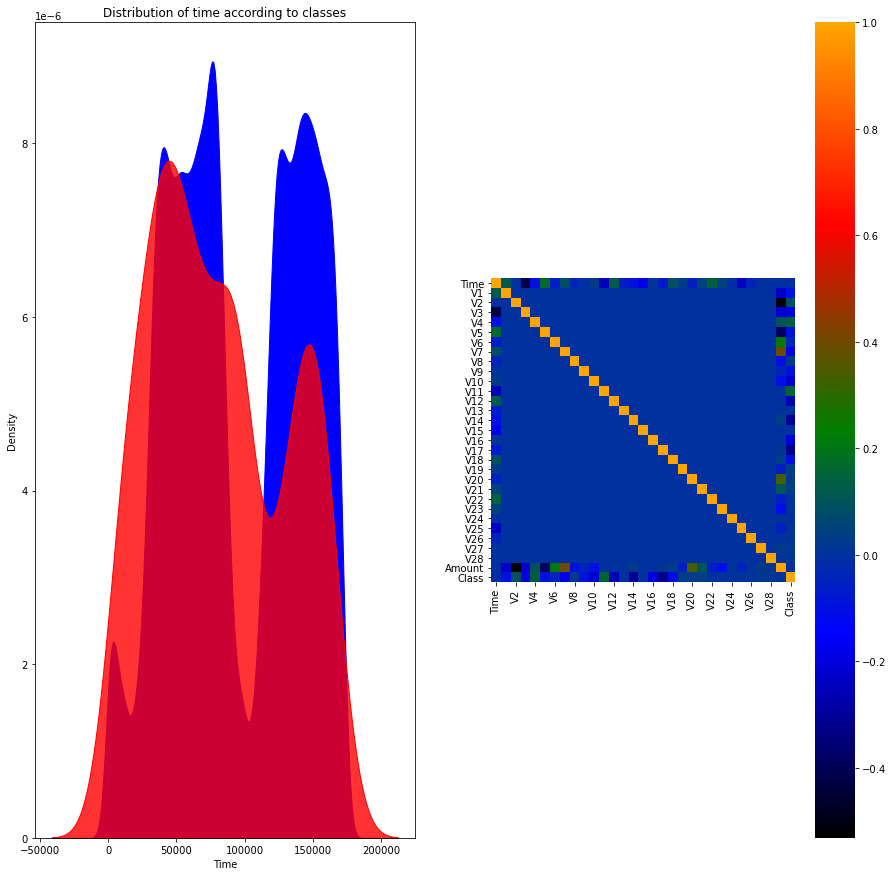

In [30]:
%%capture --no-display
fig,ax = plt.subplots(1,2,figsize=(15,15))
ax[0].set_title("Distribution of time according to classes")
sns.kdeplot(data[data['Class']==0]['Time'],ax=ax[0],color = colors[1],legend=True,shade=True,alpha=1)
sns.kdeplot(data[data['Class']==1]['Time'],ax=ax[0],color = colors[3],shade=True,legend=True,alpha=0.8)

CORR = data.corr()
sns.heatmap(CORR,cmap=cl.LinearSegmentedColormap.from_list("",colors),square=True , annot_kws={'size': 10}, ax=ax[1])


Text(0.5, 1.0, 'BoxPlot for Amount')

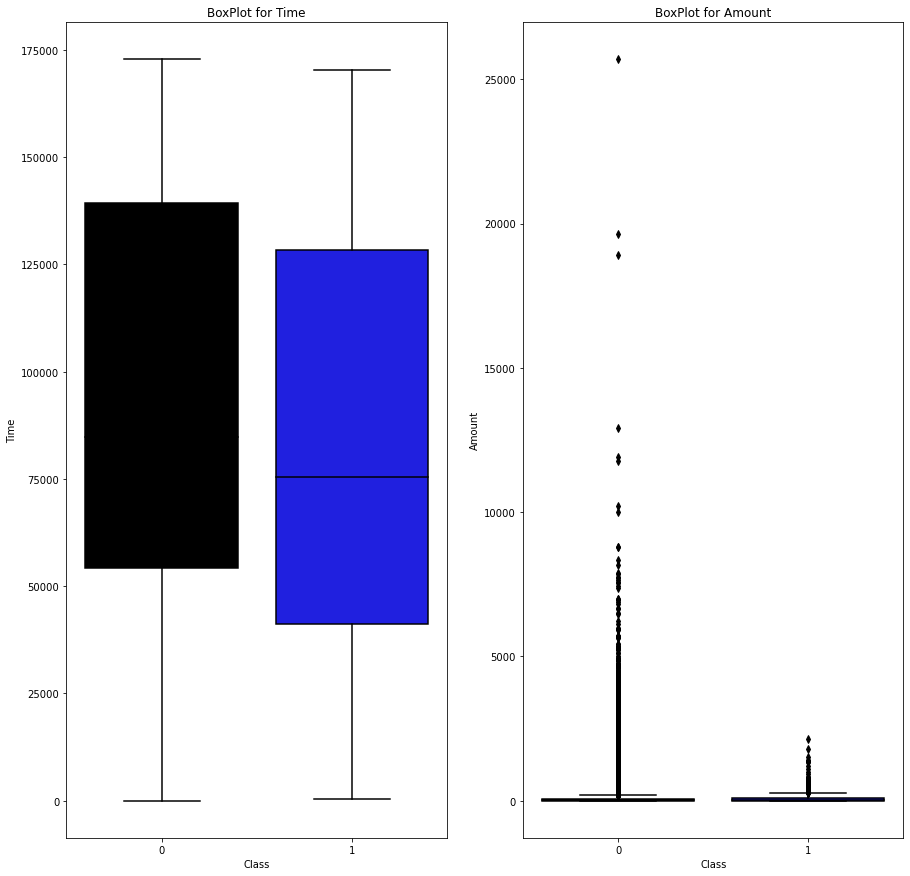

In [31]:
fig,axes = plt.subplots(1,2,figsize=(15,15))

sns.boxplot(x = data['Class'],y = data["Time"],ax=axes[0],palette=palette)
axes[0].set_title("BoxPlot for Time")
sns.boxplot(x = data['Class'],y = data.Amount,ax=axes[1],palette=palette)
axes[1].set_title("BoxPlot for Amount")

# Scaling/Normalizing Data

We will apply a RobustScaler for the Amount and Time features as the other features are already PCA transformed.

In [35]:
rbst = RobustScaler()
# Using RobustScaler 
data['Amount'] = rbst.fit_transform(data['Amount'].values.reshape(-1,1))
data['Time'] = rbst.fit_transform(data['Time'].values.reshape(-1,1))
X = data.drop('Class',axis=1)
Y = data.Class.values
trainX,testX,trainY,testY = train_test_split(X,Y,test_size=0.2,random_state=42,shuffle=True)

# Random Forest Classifier

In [36]:
clf = RandomForestClassifier(n_estimators=100,n_jobs=4,verbose=False)
clf.fit(trainX,trainY)
#Confusion Matrix of results
y_pred = clf.predict(testX)

0.8826266824962962
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.77      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962

[56884    78]


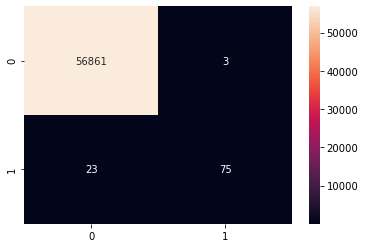

In [37]:
sns.heatmap(confusion_matrix(testY,y_pred),annot=True,fmt='0.0f')
results = classification_report(testY,y_pred)
print(roc_auc_score(testY, y_pred))
print(classification_report(testY,y_pred))
print(np.bincount(y_pred))

# Over Sample to minimize recall rather than accuracy

In [39]:
oversample = SMOTE(random_state=42)
X_smote,Y_smote = oversample.fit_resample(trainX,trainY)

<AxesSubplot:title={'center':'SMOTE Data'}, xlabel='Class', ylabel='count'>

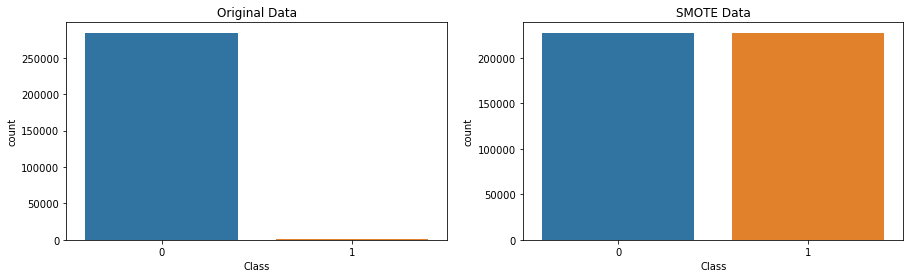

In [42]:
%%capture --no-display
fig, axes = plt.subplots(1,2,figsize=(15,4))
axes[0].set_title('Original Data')
barplot_data1 = pd.DataFrame(data['Class'], columns=['Class'])
sns.countplot('Class', data = barplot_data1, ax = axes[0])

axes[1].set_title('SMOTE Data')
barplot_data = pd.DataFrame(Y_smote, columns=['Class'])
sns.countplot('Class', data = barplot_data, ax = axes[1])

# Random Forest with Smote data

In [43]:
#Model after oversampling
clf2 = RandomForestClassifier(n_estimators=100,n_jobs=4,verbose=False)
clf2.fit(X_smote,Y_smote)
y_pred_smote = clf2.predict(testX)

0.9284834994774501
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.86      0.88        98

    accuracy                           1.00     56962
   macro avg       0.95      0.93      0.94     56962
weighted avg       1.00      1.00      1.00     56962



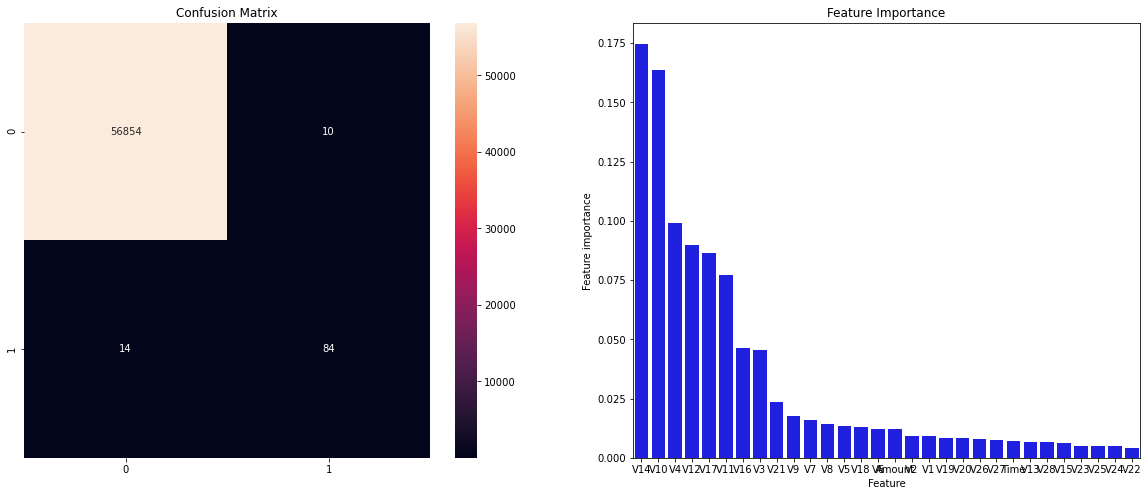

In [48]:
#Plot results
fig, axes = plt.subplots(1,2,figsize=(20,8))
axes[0].set_title("Confusion Matrix")
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('Actual Label')
sns.heatmap(confusion_matrix(testY, y_pred_smote),annot=True, fmt='0.0f', ax=axes[0])

predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10','V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19','V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28','Amount']
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf2.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp,color=colors[1],ax=axes[1])
axes[1].set_title("Feature Importance")

print(roc_auc_score(testY, y_pred_smote))
print(classification_report(testY,y_pred_smote))


# KNN Classification

In [49]:
model = Knn()
model.fit(X_smote,Y_smote)
y_pred_NN = model.predict(testX)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.48      0.88      0.62        98

    accuracy                           1.00     56962
   macro avg       0.74      0.94      0.81     56962
weighted avg       1.00      1.00      1.00     56962

0.9379401838112846


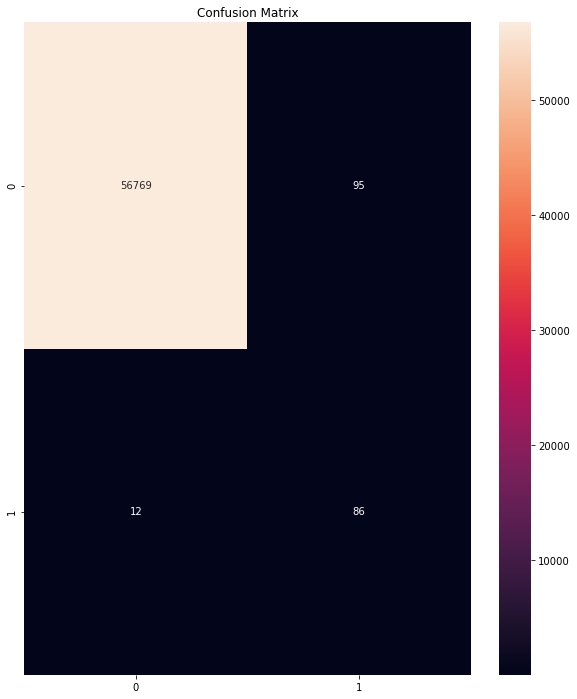

In [50]:
fig,ax = plt.subplots(1,1,figsize=(10,12))
ax.set_title("Confusion Matrix")
sns.heatmap(confusion_matrix(testY,y_pred_NN), annot=True,  fmt='0.0f')

print(classification_report(testY,y_pred_NN))
print(roc_auc_score(testY, y_pred_NN))

# Adaboost with SMOTE Data

In [51]:
adamodel = AdaBoostClassifier(random_state=42,  algorithm='SAMME.R',learning_rate=0.8,)
adamodel.fit(X_smote,Y_smote)
y_pred_ada = adamodel.predict(testX)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.93      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.56     56962
weighted avg       1.00      0.98      0.99     56962

0.9528285533403007


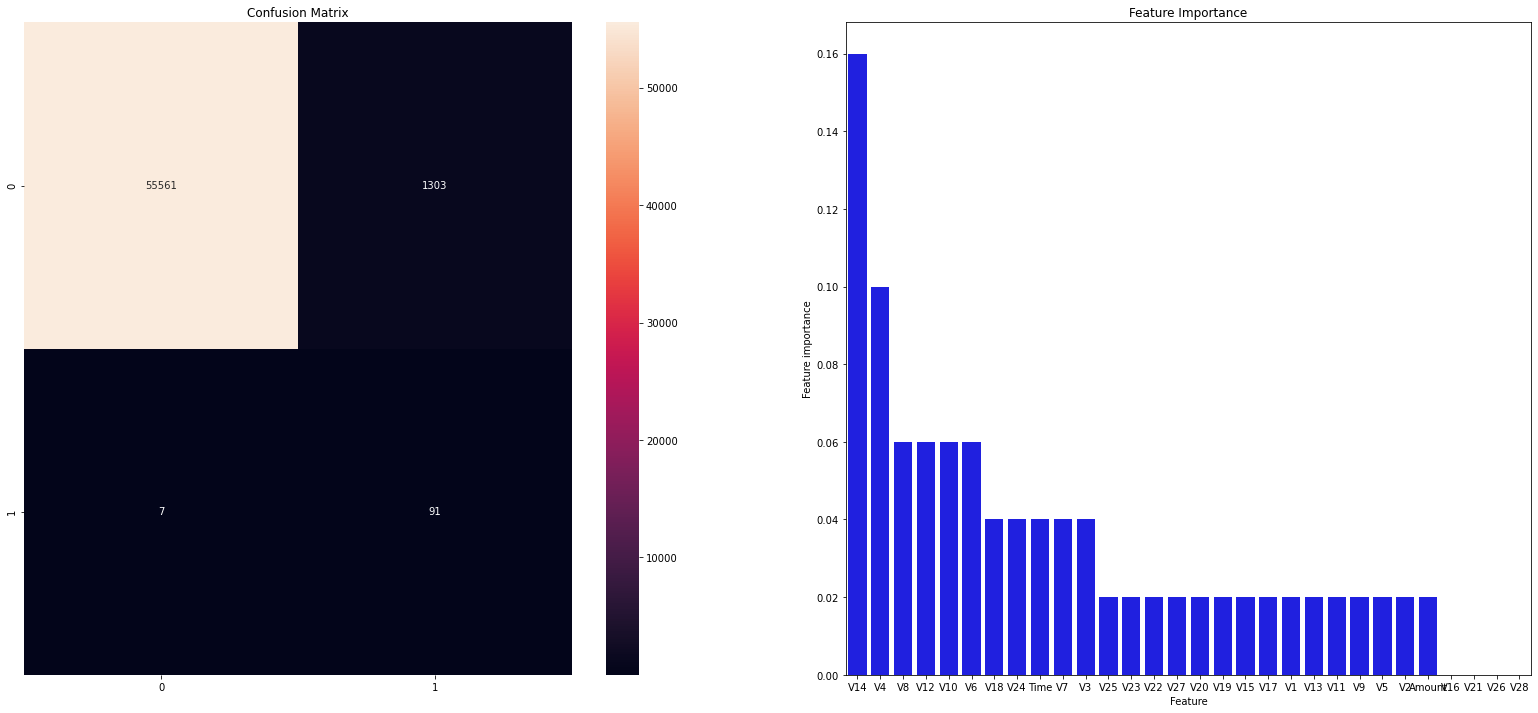

In [52]:
fig, axes = plt.subplots(1,2,figsize=(27,12))
axes[0].set_title("Confusion Matrix")
sns.heatmap(confusion_matrix(testY,y_pred_ada),annot=True,fmt='0.0f',ax=axes[0])

tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': adamodel.feature_importances_})
tmp = tmp.sort_values(by='Feature importance', ascending=False)
s = sns.barplot(x='Feature', y='Feature importance', data=tmp, color=colors[1], ax=axes[1])
axes[1].set_title("Feature Importance")

print(classification_report(testY,y_pred_ada))
print(roc_auc_score(testY,y_pred_ada))

# XGBoost

In [53]:
model_xgb = xgb.XGBClassifier(silent=True,max_depth=2,eval_metric='auc')
model_xgb.fit(X_smote,Y_smote)
y_pred_xgb = model_xgb.predict(testX)

/Users/clayolsen1/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:59:50] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.14      0.91      0.24        98

    accuracy                           0.99     56962
   macro avg       0.57      0.95      0.62     56962
weighted avg       1.00      0.99      0.99     56962

0.9491576033902588


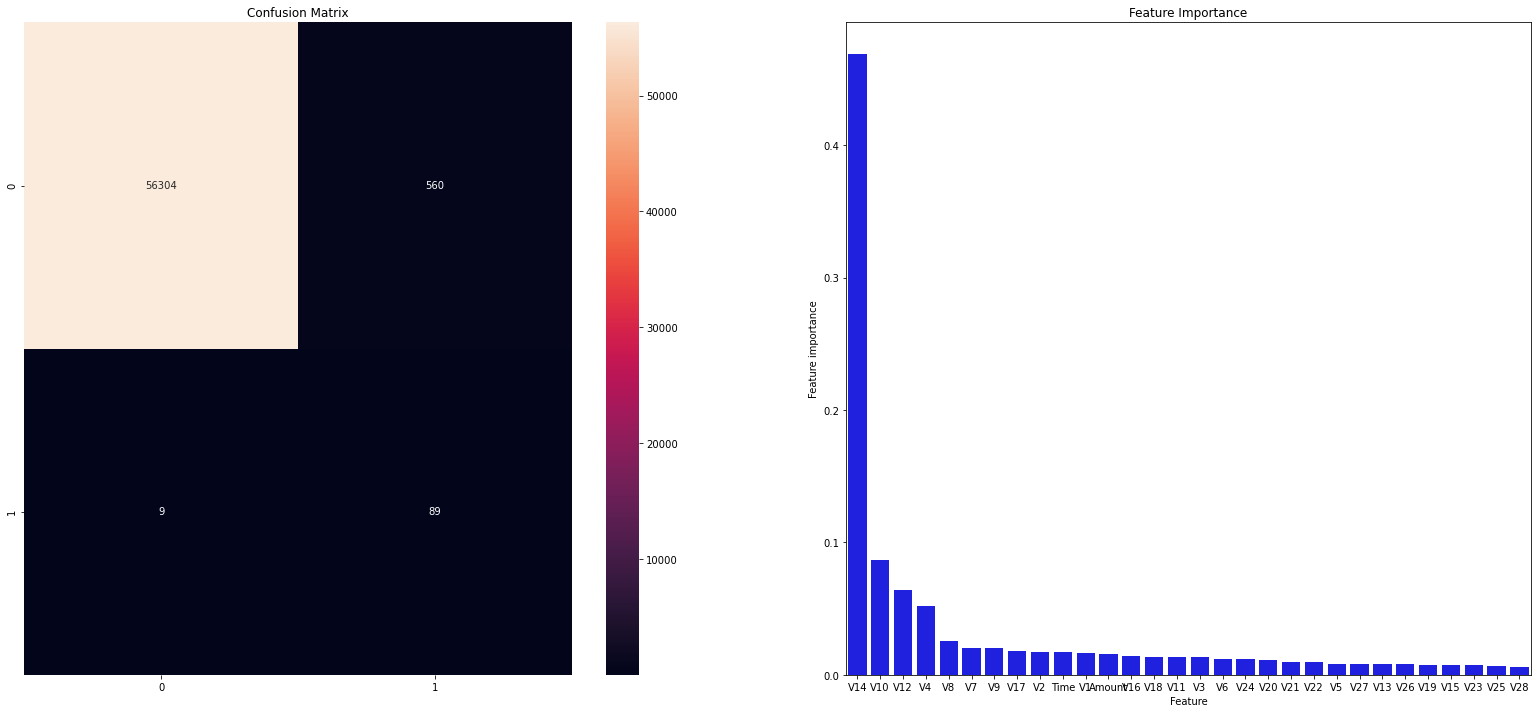

In [54]:
fig, axes = plt.subplots(1,2,figsize=(27,12))
axes[0].set_title("Confusion Matrix")
sns.heatmap(confusion_matrix(testY,y_pred_xgb),annot=True,fmt='0.0f',ax=axes[0])

tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': model_xgb.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp,color=colors[1],ax=axes[1])
axes[1].set_title("Feature Importance")
print(classification_report(testY,y_pred_xgb))
print(roc_auc_score(testY, y_pred_xgb))

# Feature Selection using XGboost


In [55]:
slm = SelectFromModel(model_xgb,threshold=0.02)
X_train_xgb = slm.fit_transform(X_smote,Y_smote)
# Because we need to select the same features as train dataset
test_xgb = np.array(testX[testX.columns[slm.get_support()]])
# Prepare the train and test datasets
dtrain = xgb.DMatrix(pd.DataFrame(X_train_xgb),Y_smote )
dtest = xgb.DMatrix(pd.DataFrame(test_xgb), testY)

#What to monitor (in this case, **train** and **test**)
watchlist = [(dtrain, 'train'), (dtest, 'test')]

/Users/clayolsen1/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:01:19] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [ ]:
params = {}
params['objective'] = 'binary:logistic'
params['silent'] = True
params['max_depth'] = 2
params['eval_metric'] = 'auc'
params['random_state'] = 42
model = xgb.train(params,dtrain,200,watchlist)

In [ ]:
y_pred = model.predict(dtest)
xgb.plot_importance(model, height=0.8, title="Feature importance ",color=colors[1],show_values=False)